In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import os
import pandas as pd
import pickle
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np

In [2]:
# Read the csv file into a pandas DataFrame

stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke = stroke.dropna()
stroke.drop(['work_type', 'Residence_type'], inplace=True, axis=1)
stroke

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,166.29,25.6,formerly smoked,0


In [4]:
target = stroke["stroke"]
target_names = ["negative", "positive"]
X = stroke[["gender", "age", "hypertension", "heart_disease", "ever_married", "avg_glucose_level", "bmi", "smoking_status"]]
y = stroke["stroke"].values.reshape(-1, 1)

In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,0,1,0,0


In [6]:
data1 = stroke.drop("stroke", axis=1)
feature_names = data.columns
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,228.69,36.6,formerly smoked
2,31112,Male,80.0,0,1,Yes,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,174.12,24.0,never smoked
5,56669,Male,81.0,0,0,Yes,186.21,29.0,formerly smoked


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, target, random_state=42)

In [8]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4336,80.00,0,1,125.32,32.9,0,1,0,0,1,1,0,0,0
3709,42.00,0,0,84.03,31.4,1,0,0,1,0,0,0,1,0
964,66.00,1,0,74.90,32.1,0,1,0,0,1,0,0,1,0
2647,29.00,0,0,102.40,26.9,0,1,0,0,1,0,0,0,1
3262,47.00,0,0,88.49,22.2,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.32,0,0,73.71,16.2,1,0,0,1,0,1,0,0,0
3848,43.00,0,0,74.86,26.9,1,0,0,0,1,0,0,1,0
38,58.00,0,0,92.62,32.0,0,1,0,1,0,1,0,0,0
4748,28.00,0,0,86.91,21.1,1,0,0,0,1,0,1,0,0


In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9144951140065146

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9495114006514658

In [11]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.32689946934084174, 'heart_disease'),
 (0.2675345146784423, 'ever_married'),
 (0.24241319829851504, 'gender'),
 (0.02630406663347064, 'age'),
 (0.02445193951214207, 'hypertension'),
 (0.01739111103184532, 'avg_glucose_level'),
 (0.0157752963820986, 'bmi'),
 (8.250760539197864e-09, 'smoking_status')]

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.914
k: 3, Train/Test Score: 0.965/0.939
k: 5, Train/Test Score: 0.961/0.948
k: 7, Train/Test Score: 0.960/0.949
k: 9, Train/Test Score: 0.960/0.949
k: 11, Train/Test Score: 0.960/0.949
k: 13, Train/Test Score: 0.960/0.949
k: 15, Train/Test Score: 0.960/0.949
k: 17, Train/Test Score: 0.960/0.949
k: 19, Train/Test Score: 0.960/0.949


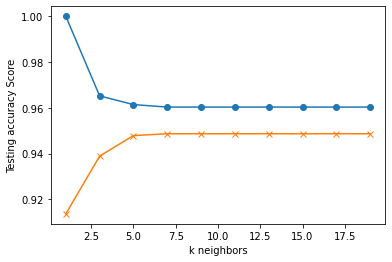

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [15]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear', probability = True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [16]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.949


In [17]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.95      1.00      0.97      1165
    positive       0.00      0.00      0.00        63

    accuracy                           0.95      1228
   macro avg       0.47      0.50      0.49      1228
weighted avg       0.90      0.95      0.92      1228



C:\Users\micky\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)